In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("travel.csv")
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [5]:
df.Gender.unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [6]:
df=df.replace("Fe Male","Female")


In [7]:
df["Gender"].unique() #we successfully changed it 

array(['Female', 'Male'], dtype=object)

In [8]:
#finding null values--
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [9]:
#percentage value of null values in the data --
(df.isnull().sum()/len(df.index))*100

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

In [10]:
#as null values percentage is very low we can drop thoes values 
df.dropna(axis=0,inplace=True)
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [11]:
df.shape

(4128, 20)

In [12]:
# manusally converting categorical cols and numeric cols 

cats = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport',
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation']
nums = ['CustomerID', 'Age', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips',
       'NumberOfChildrenVisiting', 'MonthlyIncome']

In [13]:
cats

['ProdTaken',
 'CityTier',
 'PreferredPropertyStar',
 'Passport',
 'OwnCar',
 'PitchSatisfactionScore',
 'TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [14]:
nums

['CustomerID',
 'Age',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

# univerient analysis 

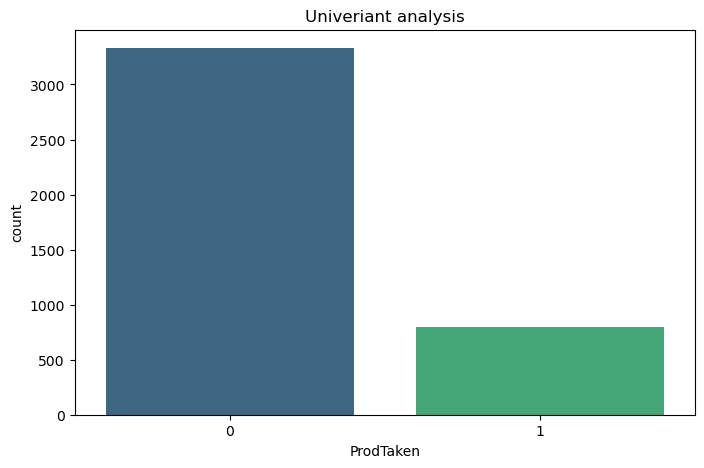

In [16]:
# for categorical cols ---

plt.figure(figsize=(8,5))
sns.countplot(x=df["ProdTaken"],palette="viridis")
plt.title("Univeriant analysis")
plt.show()

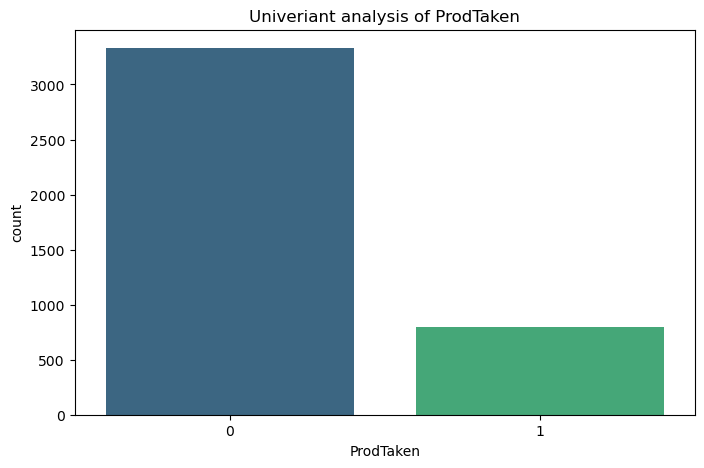

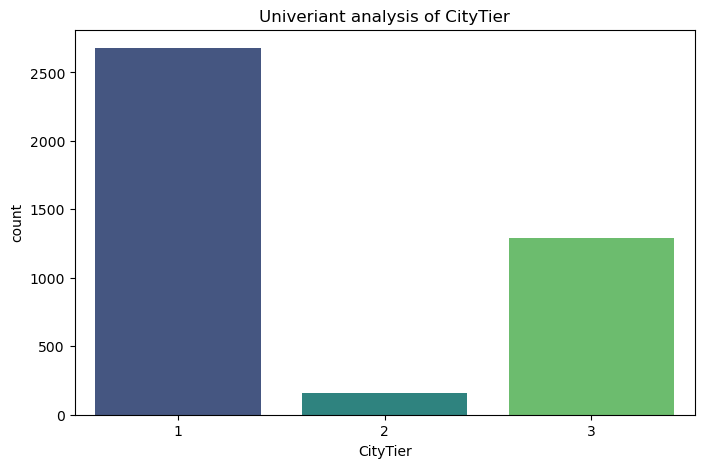

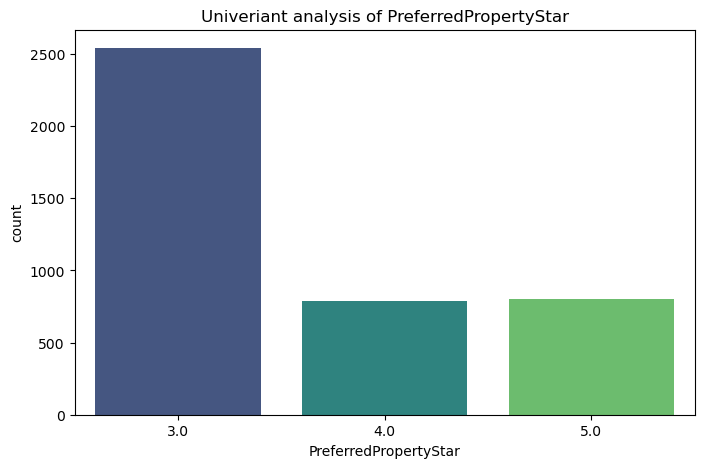

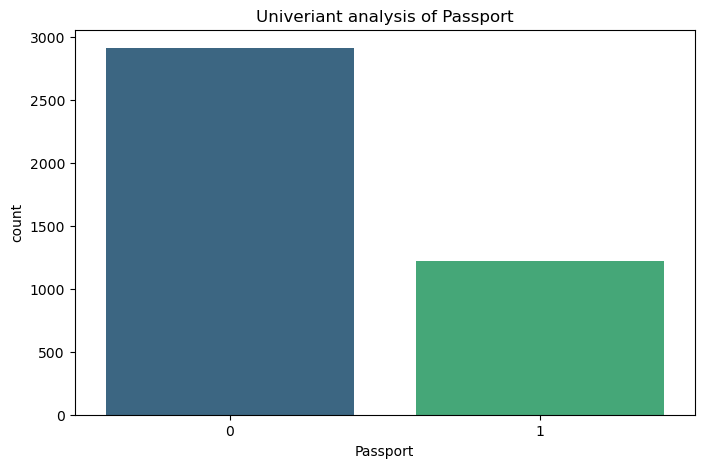

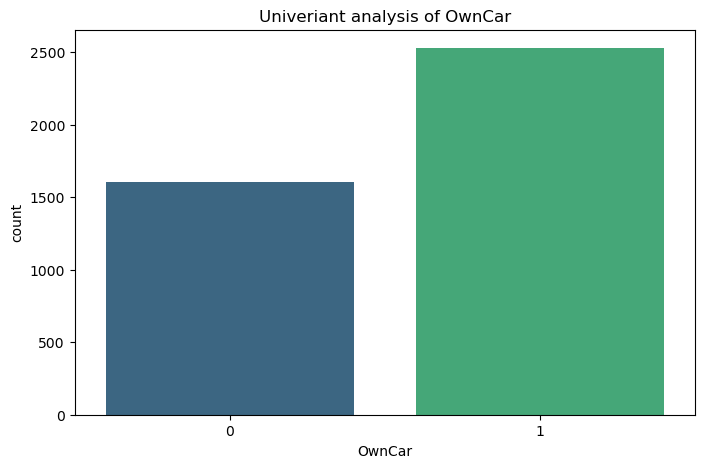

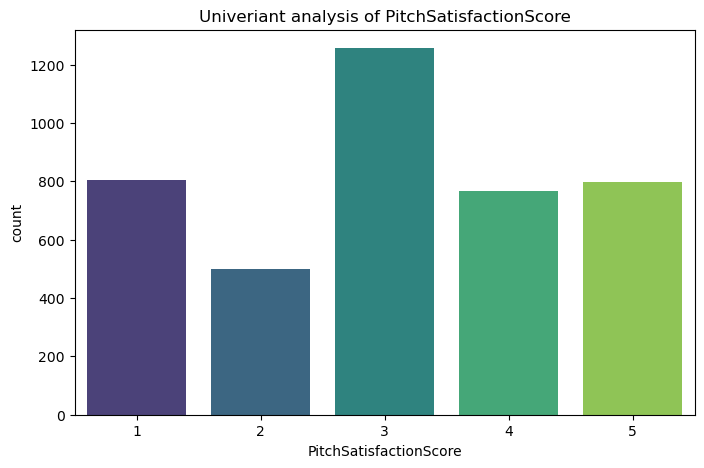

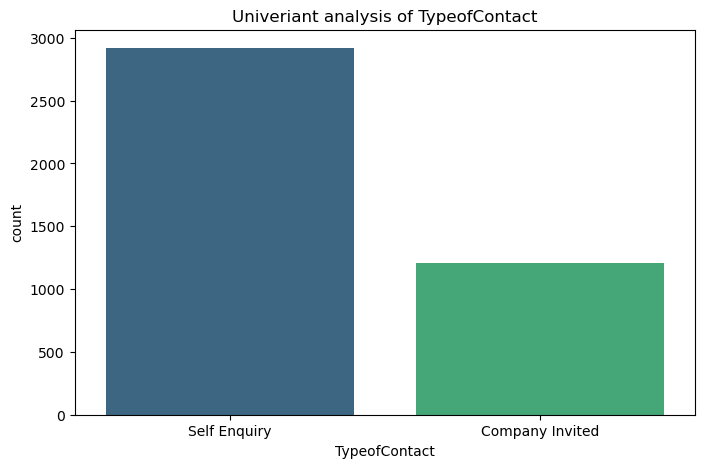

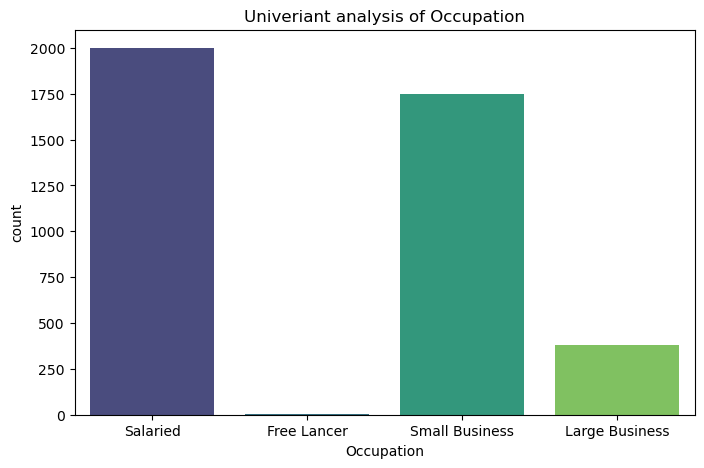

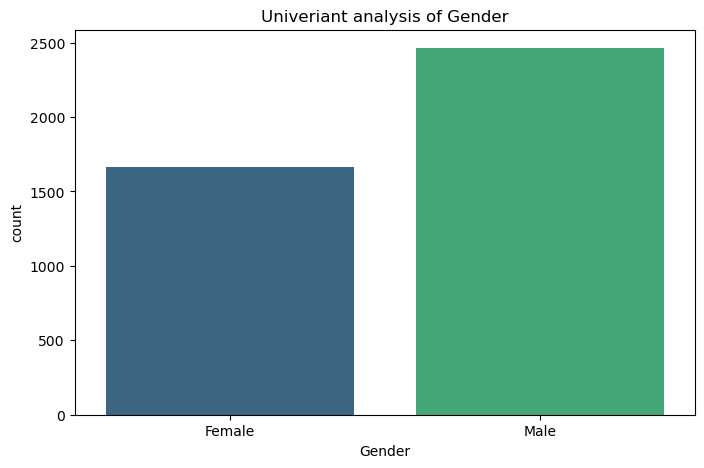

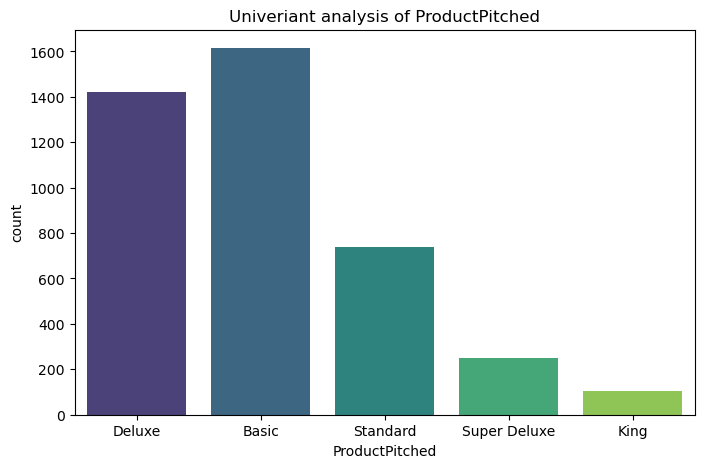

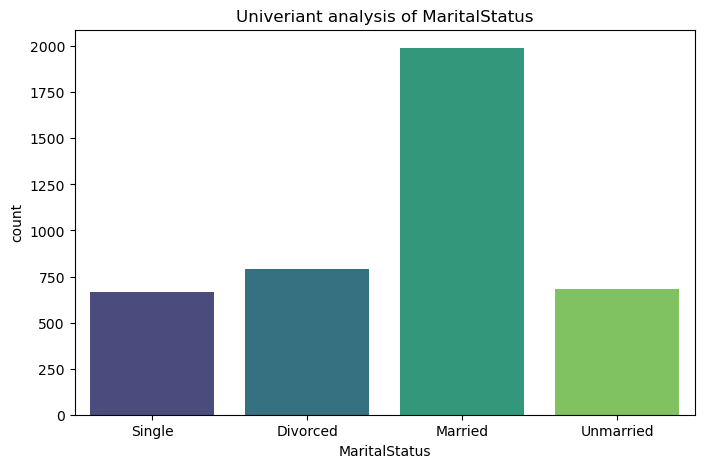

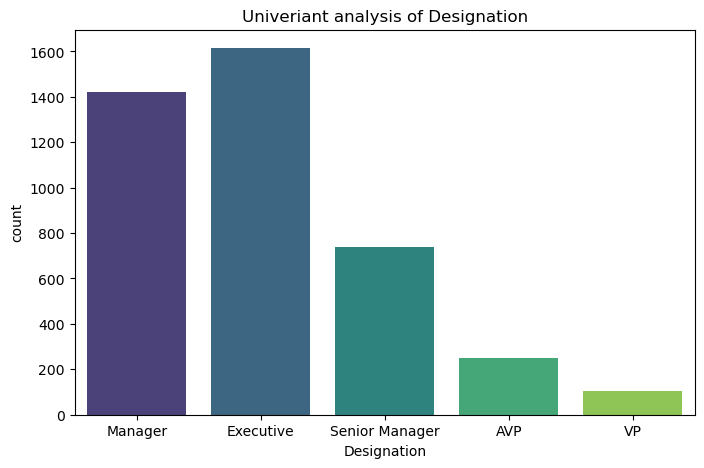

In [17]:
# automated countplot ---
# it automatically plots countplot in respect to other data.


for i in cats:
    plt.figure(figsize=(8,5))
    sns.countplot(x=i,data=df,palette="viridis")
    plt.title(f"Univeriant analysis of {i}")
    plt.show()

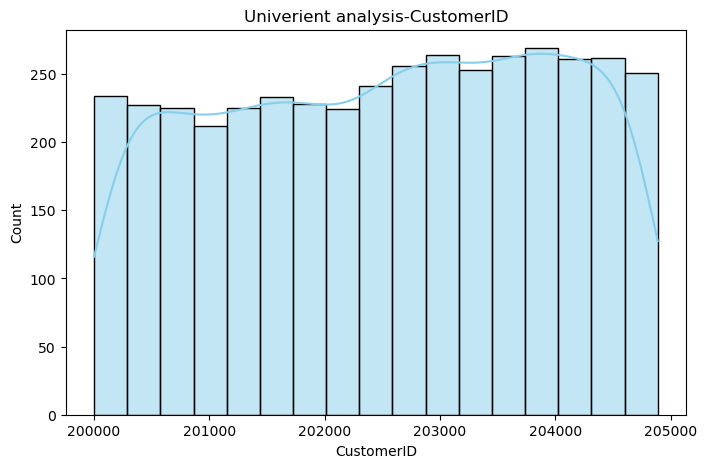

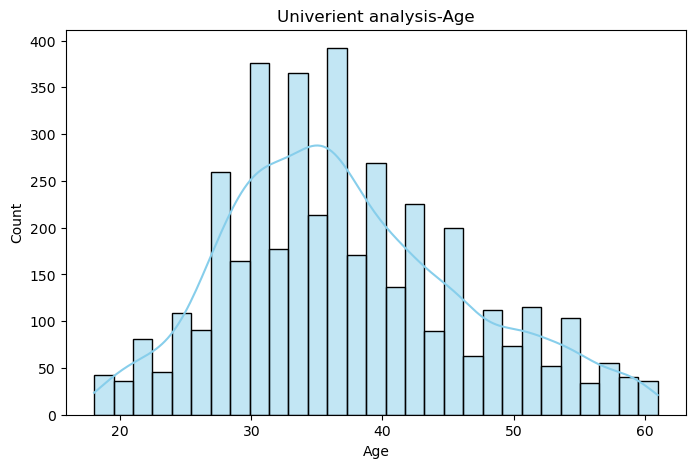

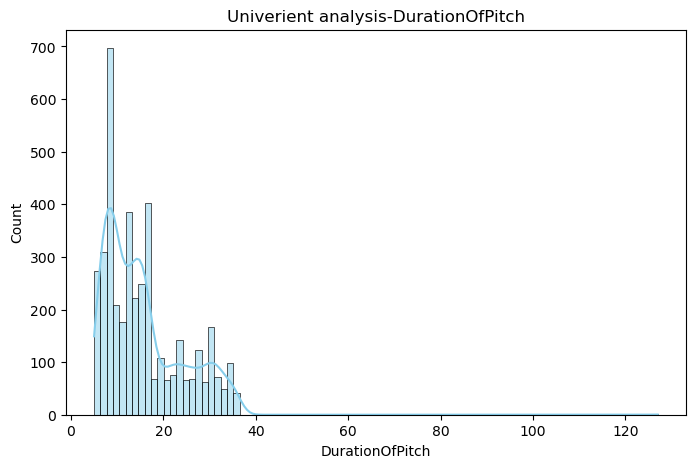

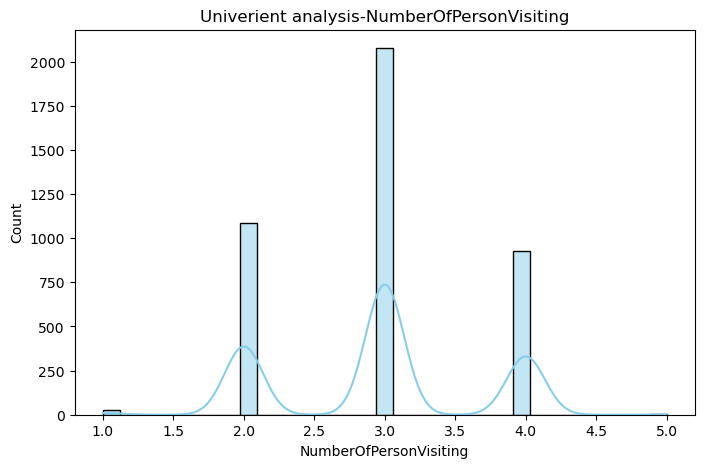

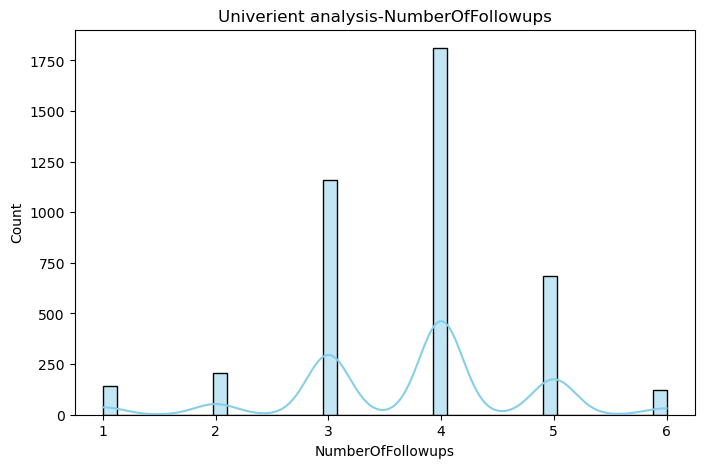

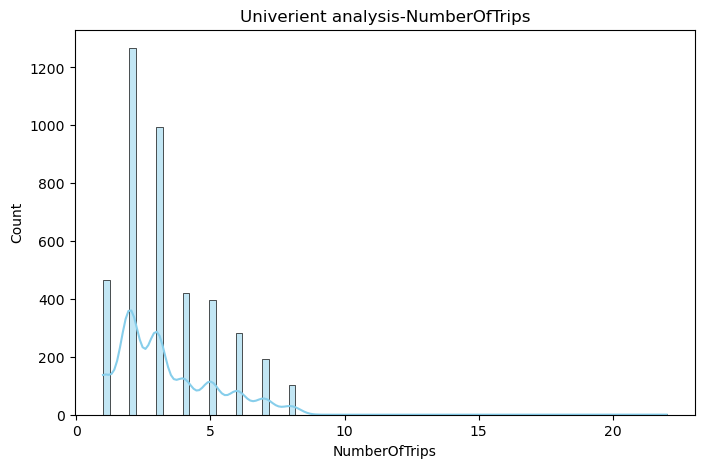

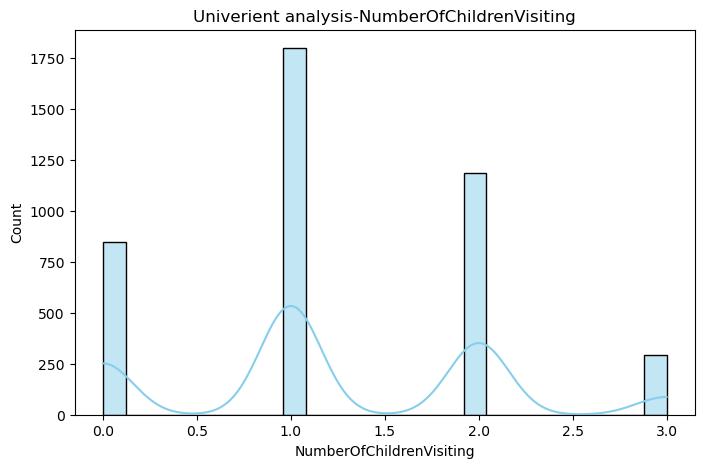

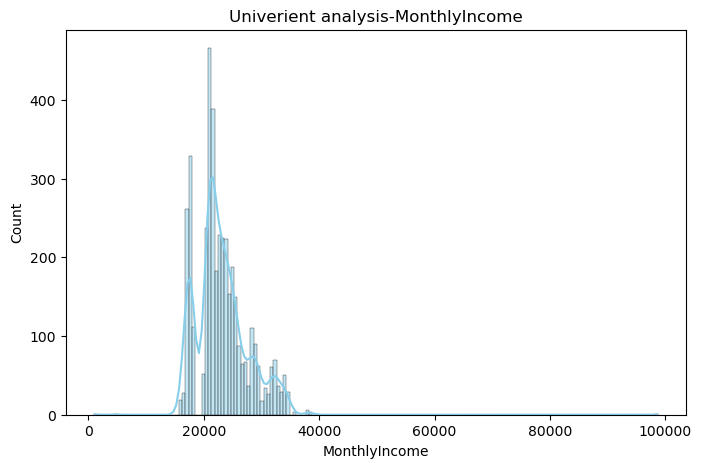

In [18]:
# univerient analysis for numerical cols automatic wat

for k in nums:
    plt.figure(figsize=(8,5))
    sns.histplot(df[k],kde=True,color="skyblue") #as data are not continuous we use bar chart
    plt.title(f"Univerient analysis-{k}")

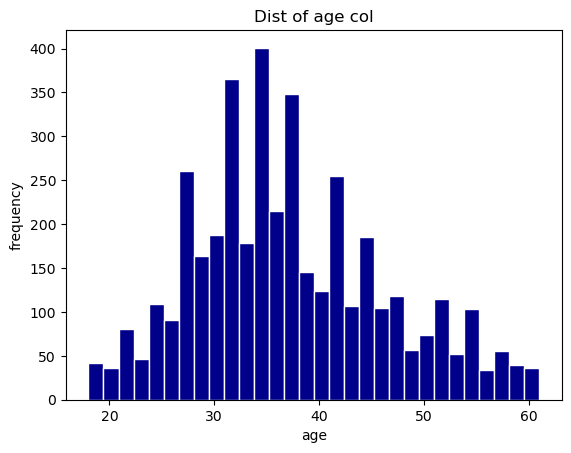

In [19]:
plt.hist(df["Age"].dropna(),bins=30,color="darkblue",edgecolor="White")
plt.title("Dist of age col")
plt.ylabel("frequency")
plt.xlabel("age")
plt.show()


#insights>> 30-40 age group people travelling more  

In [20]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [21]:
df.TypeofContact.unique()

array(['Self Enquiry', 'Company Invited'], dtype=object)

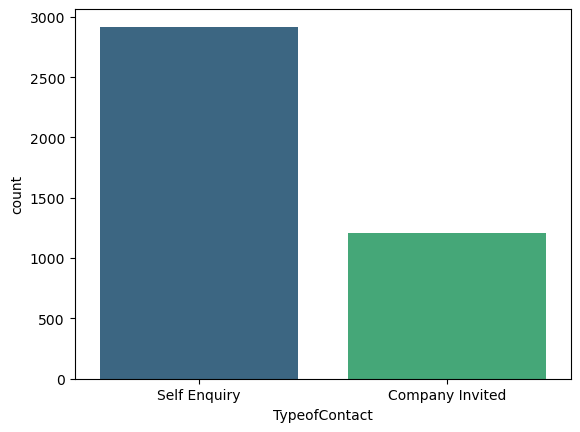

In [22]:
sns.countplot(x=df["TypeofContact"],palette="viridis")
plt.show() 


#insight>> self Enquiry is more than the company invited, so the servicer is good,
# or customer referring the company to there knows ones 

In [23]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [24]:
df.CityTier.unique()
#CityTier is numerical and if we do df.dscribe() will calculate mean,median , sytd. But thats make no sense.
df.describe() #here mean of 1.663275 for CityTier makes no sense.



,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.0000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,202527.763808,0.193072,37.231831,1.663275,15.584787,2.949370,3.741521,3.578488,3.2953,0.295300,3.060804,0.612161,1.223595,23178.464147
std,1409.439133,0.394757,9.174521,0.920640,8.398142,0.718818,1.006786,0.795031,1.8563,0.456233,1.363064,0.487317,0.852685,4506.614622
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.0000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201320.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.0000,0.000000,2.000000,0.000000,1.000000,20751.000000
50%,202603.500000,0.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.0000,0.000000,3.000000,1.000000,1.000000,22418.000000
75%,203748.250000,0.000000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.0000,1.000000,4.000000,1.000000,2.000000,25301.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.0000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [25]:
df[nums].describe().T 

,count,mean,std,min,25%,50%,75%,max
CustomerID,4128.0,202527.763808,1409.439133,200000.0,201320.75,202603.5,203748.25,204887.0
Age,4128.0,37.231831,9.174521,18.0,31.00,36.0,43.00,61.0
DurationOfPitch,4128.0,15.584787,8.398142,5.0,9.00,14.0,20.00,127.0
NumberOfPersonVisiting,4128.0,2.949370,0.718818,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4128.0,3.741521,1.006786,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4128.0,3.295300,1.856300,1.0,2.00,3.0,4.00,22.0
NumberOfChildrenVisiting,4128.0,1.223595,0.852685,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4128.0,23178.464147,4506.614622,1000.0,20751.00,22418.0,25301.00,98678.0


In [26]:
df[cats].describe().T #this makes no sense,as it contsin discrete values.

# so mean values dosnt make any sense.
#so this cols are to be treated as categorical cols 


,count,mean,std,min,25%,50%,75%,max
ProdTaken,4128.0,0.193072,0.394757,0.0,0.0,0.0,0.0,1.0
CityTier,4128.0,1.663275,0.920640,1.0,1.0,1.0,3.0,3.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.0,3.0,4.0,5.0
Passport,4128.0,0.295300,0.456233,0.0,0.0,0.0,1.0,1.0
OwnCar,4128.0,0.612161,0.487317,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,4128.0,3.060804,1.363064,1.0,2.0,3.0,4.0,5.0


In [27]:
#To treat this cols as categorical col we convert those into objects 

df[cats]=df[cats].astype("object")
df[cats].describe().T #now it dosnt show mean,meadian values ...
# but  shows count, unique, top, freq col those are actually important for categorical datas 

,count,unique,top,freq
ProdTaken,4128,2,0,3331
CityTier,4128,3,1,2678
PreferredPropertyStar,4128.0,3.0,3.0,2541.0
Passport,4128,2,0,2909
OwnCar,4128,2,1,2527
PitchSatisfactionScore,4128,5,3,1257
TypeofContact,4128,2,Self Enquiry,2918
Occupation,4128,4,Salaried,1999
Gender,4128,2,Male,2463
ProductPitched,4128,5,Basic,1615


In [28]:
for i in df[cats].columns:
    x=df[i].unique()
    print(f"{i}:{x}")
    print()

ProdTaken:[1 0]

CityTier:[3 1 2]

PreferredPropertyStar:[3.0 4.0 5.0]

Passport:[1 0]

OwnCar:[1 0]

PitchSatisfactionScore:[2 3 5 4 1]

TypeofContact:['Self Enquiry' 'Company Invited']

Occupation:['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender:['Female' 'Male']

ProductPitched:['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

MaritalStatus:['Single' 'Divorced' 'Married' 'Unmarried']

Designation:['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



# bi - varient analysis

In [30]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='DurationOfPitch'>

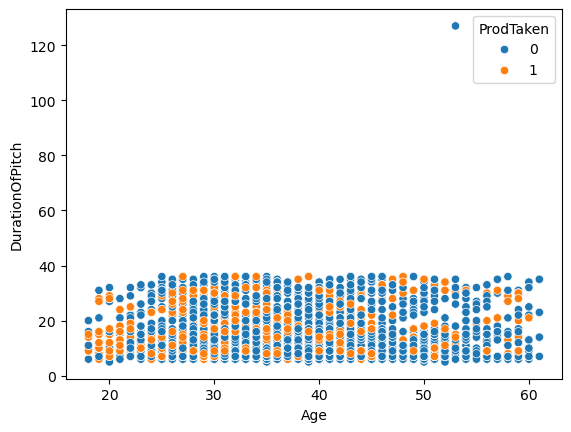

In [31]:
sns.scatterplot(x=df["Age"],y=df["DurationOfPitch"],hue=df["ProdTaken"])

# insight>>below 40 people takes more this product

<Axes: xlabel='MaritalStatus'>

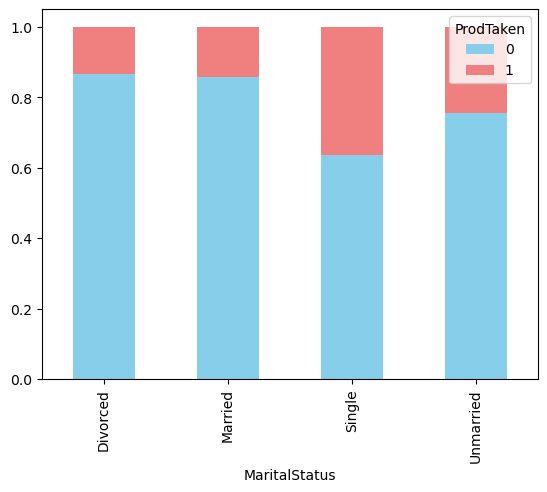

In [32]:
cross_tab=pd.crosstab(df["MaritalStatus"],df["ProdTaken"],normalize="index")
cross_tab

cross_tab.plot(kind="bar",stacked=True,color=["skyblue","lightcoral"])

#insight >> mostly single people take this product compared to other categories 

<Axes: xlabel='ProductPitched', ylabel='PitchSatisfactionScore'>

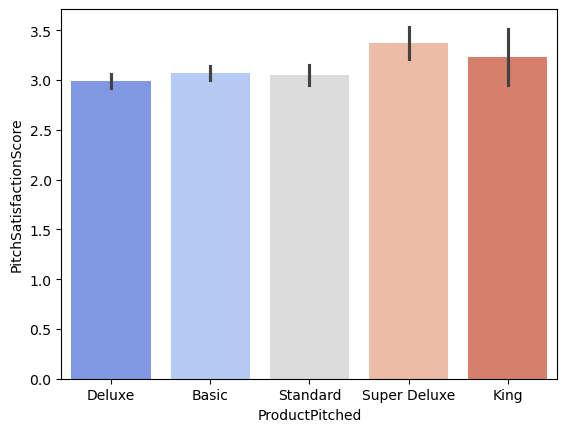

In [33]:
sns.barplot(x=df["ProductPitched"],y=df["PitchSatisfactionScore"],palette="coolwarm")

#so most people liking the super delux package, delux being the least

<Axes: xlabel='NumberOfFollowups', ylabel='PitchSatisfactionScore'>

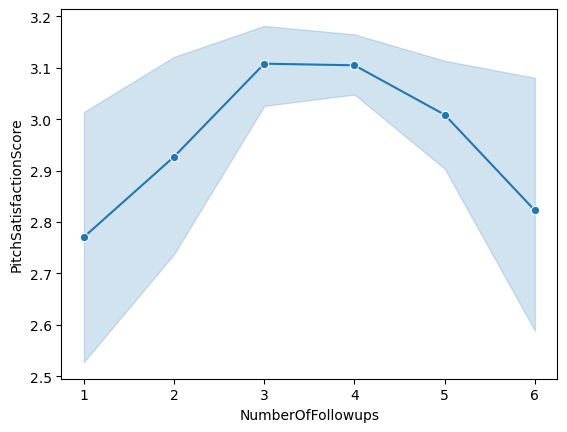

In [34]:
sns.lineplot(x=df["NumberOfFollowups"],y=df["PitchSatisfactionScore"],palette="coolwarm",marker="o")

#insight>> maximum 3-4 number of followup should be there, more than that pitchsatisfraction decrease

# multivarient analysis

<Axes: xlabel='ProdTaken', ylabel='Age'>

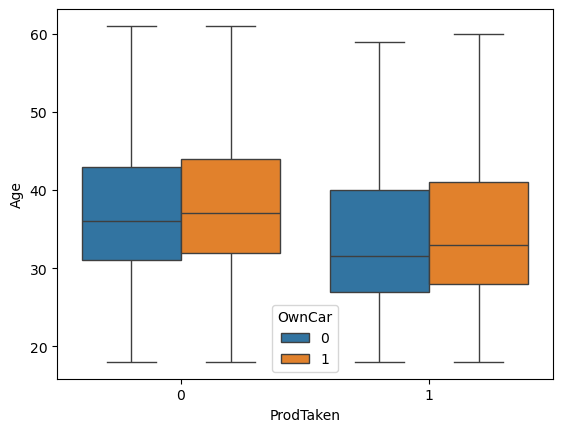

In [36]:
sns.boxplot(x=df["ProdTaken"],y=df["Age"],hue=df["OwnCar"])

<Axes: xlabel='Gender', ylabel='Age'>

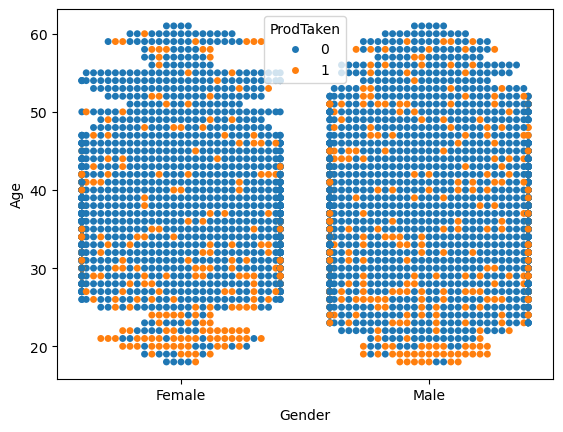

In [37]:
sns.swarmplot(x=df["Gender"],y=df["Age"],hue=df["ProdTaken"])

#insights>> female less than 30 takes this product compare to oder females
# for males , the product tsaken is spread 

<Axes: xlabel='Gender', ylabel='Age'>

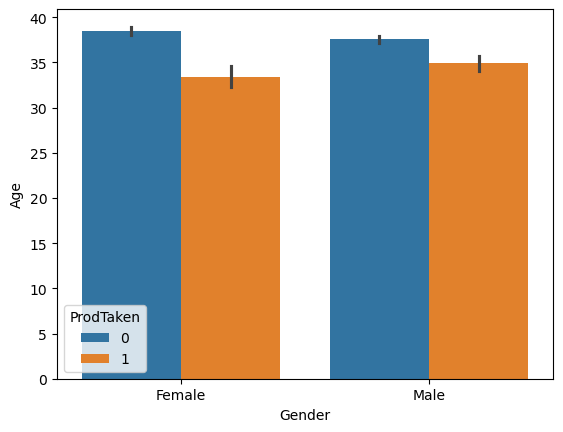

In [38]:
sns.barplot(x=df["Gender"],y=df["Age"],hue=df["ProdTaken"])

#males take this more compare to females.

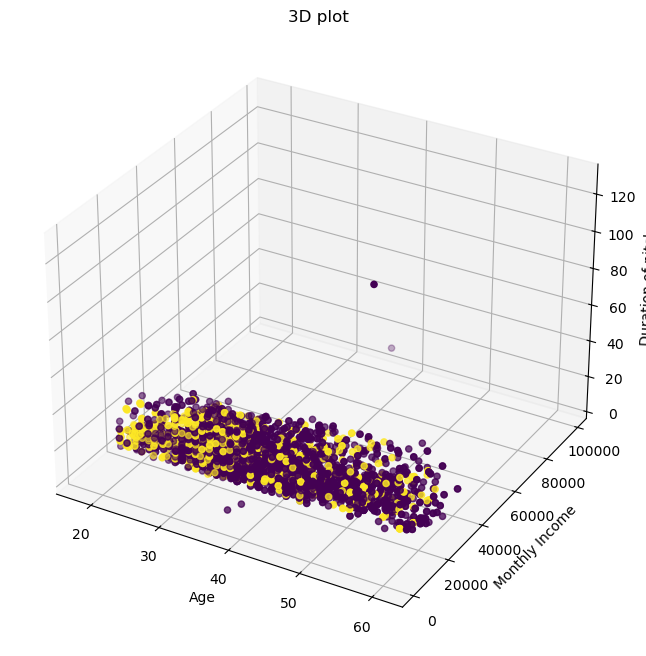

In [39]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(df["Age"],df["MonthlyIncome"],df["DurationOfPitch"],c=df["ProdTaken"],cmap="viridis")
ax.set_xlabel("Age")
ax.set_ylabel("Monthly Income")
ax.set_zlabel("Duration of pitch")
ax.set_title("3D plot")
plt.show()

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

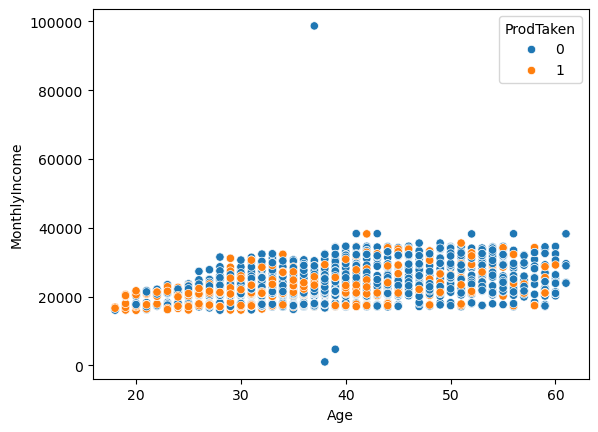

In [40]:
sns.scatterplot(x=df["Age"],y=df["MonthlyIncome"],hue=df["ProdTaken"])

#insight>> having salary over 30k and age over 43 age they are not taking this service
# so we should focus/target those age < 40

<Axes: >

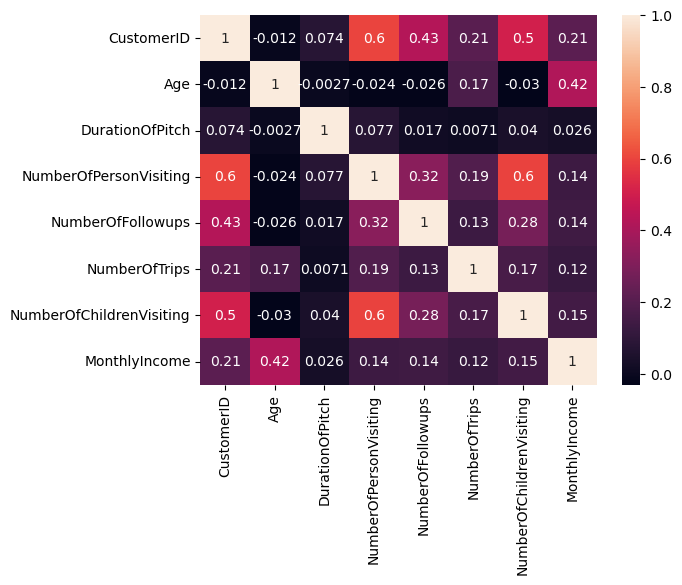

In [41]:
numeric_cols=df.select_dtypes(include="number")
sns.heatmap(numeric_cols.corr(),annot=True)

<Axes: >

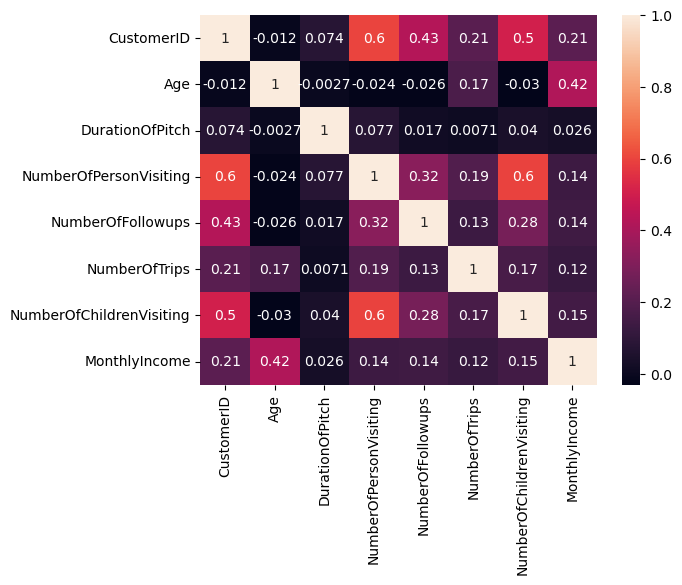

In [42]:
#here we run heatmap code on already separated numeric datset which we done already
sns.heatmap(df[nums].corr(),annot=True)

# Feature engineering 

In [44]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [45]:
df=df.drop("CustomerID",axis=1)

In [46]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [47]:
# numer of person visting+number of children visiting= total visting.

df["total_visiting"]=df["NumberOfPersonVisiting"]+df["NumberOfChildrenVisiting"]
df=df.drop(["NumberOfChildrenVisiting","NumberOfPersonVisiting"],axis=1)
df.head()


,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,total_visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3.0,Basic,3.0,Single,1.0,0,5,1,Executive,18068.0,4.0


In [48]:
# separating the numerical cols from the data set ----

num_feature=[i for i in df.columns if df[i].dtype!="O"]
num_feature

['Age',
 'DurationOfPitch',
 'NumberOfFollowups',
 'NumberOfTrips',
 'MonthlyIncome',
 'total_visiting']

In [49]:
# separating the categorical cols from the data set ----

cat_feature=[i for i in df.columns if df[i].dtype=="O"]
cat_feature

['ProdTaken',
 'TypeofContact',
 'CityTier',
 'Occupation',
 'Gender',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'Designation']

In [50]:
# some feature are discreate in nature, so we needs to puts those in charegorical dataset

discrete_feature = []
for i in num_feature:
    if len(df[i].unique()) > 25:
        discrete_feature.append(i)

# Creating a new data frame with the selected columns
df[discrete_feature]



,Age,DurationOfPitch,MonthlyIncome
0,41.0,6.0,20993.0
1,49.0,14.0,20130.0
2,37.0,8.0,17090.0
3,33.0,9.0,17909.0
5,32.0,8.0,18068.0
...,...,...,...
4883,49.0,9.0,26576.0
4884,28.0,31.0,21212.0
4885,52.0,17.0,31820.0
4886,19.0,16.0,20289.0


In [51]:
# train test split

from sklearn.model_selection import train_test_split

X=df.drop(["ProdTaken"],axis=1) #here target col is Prodtaken
y=df["ProdTaken"]

In [52]:
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,total_visiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
5,32.0,Company Invited,1,8.0,Salaried,Male,3.0,Basic,3.0,Single,1.0,0,5,1,Executive,18068.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Single,3.0,1,3,1,Executive,21212.0,6.0
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Single,3.0,0,5,0,Executive,20289.0,5.0


In [53]:
y

0       1
1       0
2       1
3       0
5       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4128, dtype: object

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [55]:
#data is either numerical or categorical
#numerical can be discrete and continuous
#discrite data through numerical but should be treated as categorical 
# For model building all the categorical data should be converted into a number 

cat_feature2=X.select_dtypes(include="object").columns
num_feature2=X.select_dtypes(exclude="object").columns

In [56]:
cat_feature2

Index(['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation'],
      dtype='object')

In [57]:
num_feature2

Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips',
       'MonthlyIncome', 'total_visiting'],
      dtype='object')

# scaling should be done on numerical feature 
# for categorical data we do OneHot ENCODING 

In [59]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler #both are for data transformation 
from sklearn.compose import ColumnTransformer # it use to transfromations to columns of an array or pandas dataframe.  

# This estimator allows different columns or column subsets of the 
# input to be transformed separately and the features generated by each 
# transformer will be concatenated to form a single feature space. 
# This is useful for heterogeneous or columnar data, to combine several 
# feature 
# extraction mechanisms or transformations into a single transformer.

In [60]:
numeric_transformer= StandardScaler()
onh_transformation= OneHotEncoder(drop="first")
preprocessor=ColumnTransformer([
    ("OneHotEncoder", onh_transformation,cat_feature2),
    ("StandardScaler",numeric_transformer,num_feature2)
])
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips',
       'MonthlyIncome', 'total_visiting'],
      dtype='object'))])

In [61]:
X_train=preprocessor.fit_transform(X_train)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.731350,-0.059719,0.242407,-0.712301,-0.339286,0.580957
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.635063,-0.427614,0.242407,1.452465,-0.527440,1.290920
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.279493,1.411863,-0.744556,0.911274,2.129980,-0.838969
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.196548,-0.182351,1.229369,-0.712301,-0.102613,-0.129006
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.854320,-0.918141,0.242407,-0.712301,-1.295202,-0.129006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.351595,2.025022,1.229369,-0.171110,-0.038504,0.580957
3298,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-0.022709,0.185545,0.242407,0.911274,0.570524,2.000882
3299,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.854320,-0.918141,0.242407,-0.712301,-0.527659,-0.838969
3300,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.241967,-0.672878,1.229369,0.911274,-0.332919,-0.129006


In [62]:
X_test=preprocessor.fit_transform(X_test)
X_test

array([[ 1.        ,  0.        ,  0.        , ..., -1.17241264,
        -1.35884096, -1.53508815],
       [ 1.        ,  0.        ,  0.        , ...,  2.53798138,
        -0.44099282,  0.61890304],
       [ 1.        ,  0.        ,  0.        , ..., -0.11230006,
        -1.24945167, -0.81709109],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.41775623,
         0.20187248,  2.05489717],
       [ 1.        ,  0.        ,  1.        , ..., -0.64235635,
        -0.66464863, -0.81709109],
       [ 1.        ,  0.        ,  0.        , ...,  0.94781252,
         0.40416138,  0.61890304]])